In [2]:
from google.colab import files
up=files.upload() 

Saving heart.csv to heart.csv


In [0]:
import io
import pandas as pd
df=pd.read_csv(io.BytesIO(up["heart.csv"]))


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from matplotlib.cm import rainbow
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

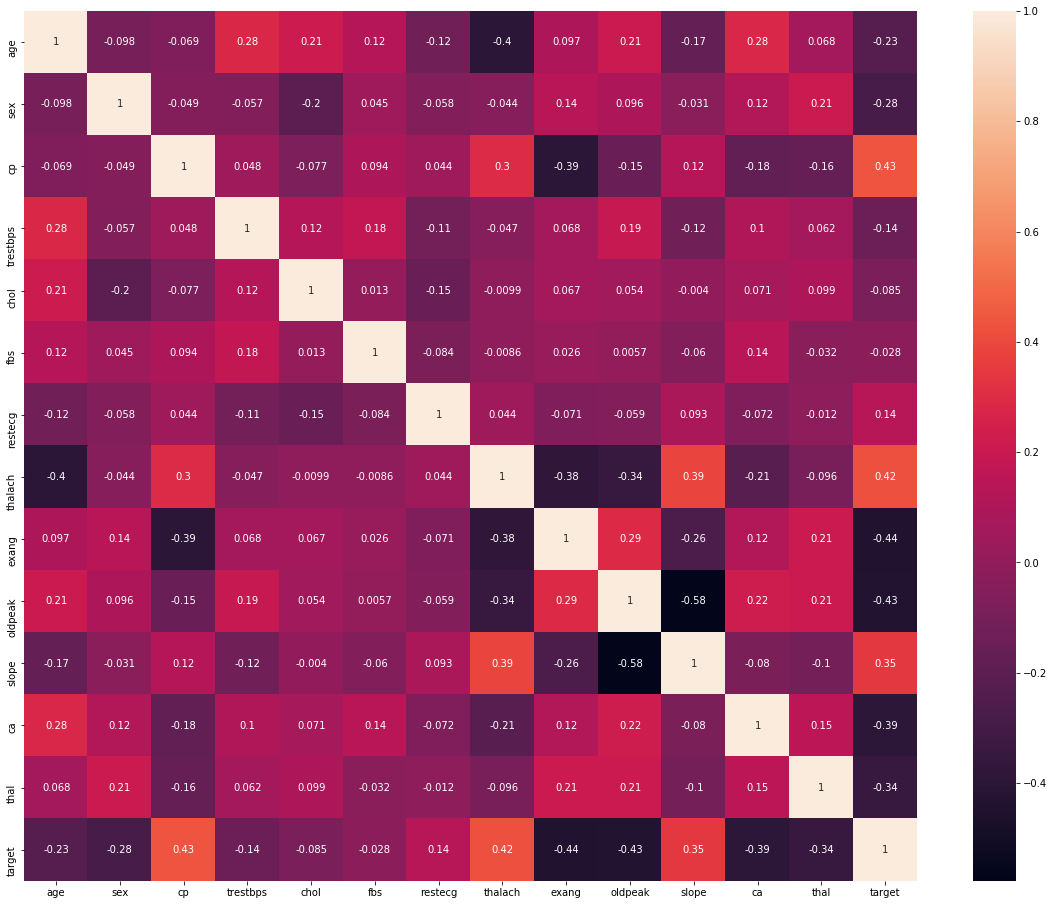

In [14]:
cor=df.corr()
top_cor=cor.index
plt.figure(figsize=(20,16))
sns.heatmap(df[top_cor].corr(),annot=True)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2a63d5cc0>,
      dtype=object)

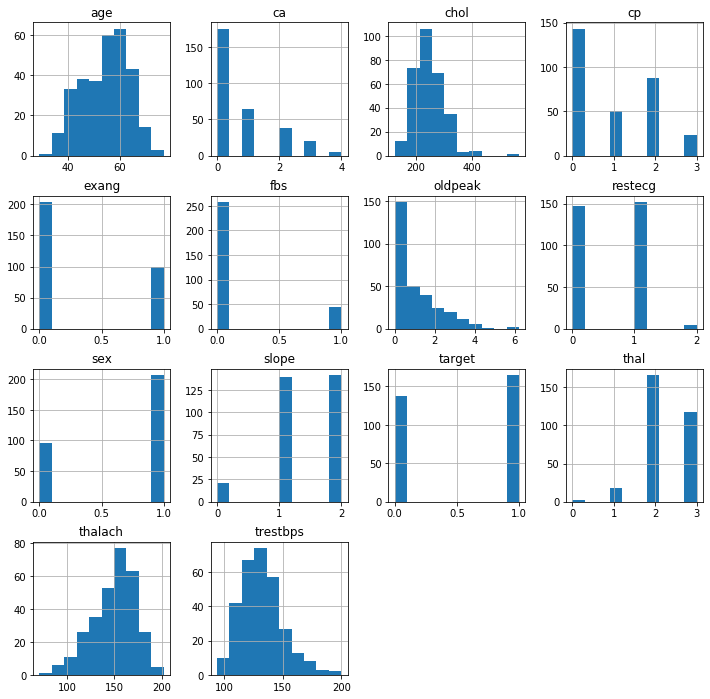

In [16]:
df.hist(figsize=(12,12))

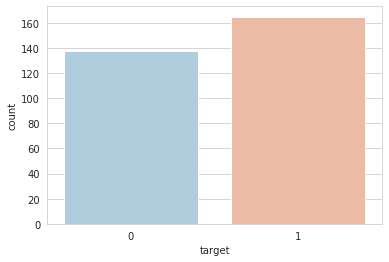

In [19]:
sns.set_style("whitegrid")KNeighborsClassifier
sns.countplot(x="target",data=df,palette="RdBu_r")

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
feat=["age","trestbps","oldpeak","thalach","chol"]
df[feat]=std.fit_transform(df[feat])

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [0]:
X=df.drop(["target"],axis=1)

In [0]:
y=df["target"]

In [0]:
from sklearn.model_selection import cross_val_score
k_score=[]
for k in range(1,21):
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    k_score.append(score.mean())

Text(0.5, 1.0, 'SCORE curve')

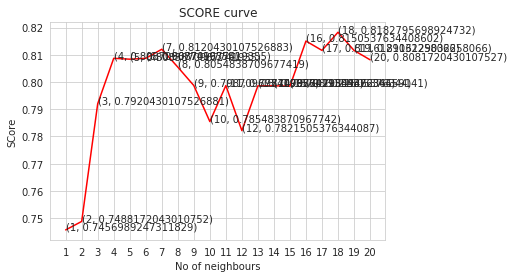

In [45]:
plt.plot([k for k in range(1,21)],k_score,color="red")
for i in range(1,21):
  plt.text(i,k_score[i-1],(i,k_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel("No of neighbours")
plt.ylabel("SCore")
plt.title("SCORE curve")

In [0]:
knn_classifier=KNeighborsClassifier(n_neighbors=18)
score=cross_val_score(knn_classifier,X,y,cv=10)
k_score.append(score.mean())

In [48]:
score.mean()

0.8182795698924732

In [50]:
random_forest=RandomForestClassifier(n_estimators=10)
score=cross_val_score(random_forest,X,y,cv=10)
score.mean()

0.8150537634408602

In [51]:
dt=DecisionTreeClassifier()
score=cross_val_score(dt,X,y,cv=10)
score.mean()

0.7682795698924731

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [66]:
random_forest.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
random_forest.score(X_test,y_test)

0.8157894736842105

In [0]:
y_pred=random_forest.predict(X_test)


In [0]:
 from sklearn.metrics import confusion_matrix
 cm=confusion_matrix(y_test,y_pred)

In [70]:
cm

array([[26,  7],
       [ 7, 36]])